In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
data=pd.read_csv(filepath_or_buffer="data/final.csv",delimiter=";",index_col=False).round(2)

# Final data
The final dataset contains 21 columns
* gameid: ID of the game on transfermarkt
* tournament: tournament during which the game took place
* gametype: which round of the tournament the game took place in
* teamA: The first team
* teamidA: ID of the first team on transfermarkt
* teamB: The second team
* teamidB: ID of the second team on transfermarkt
* resultA: Number of goals scored by the first team in that game
* resultB: Number of goals scored by the second team in that game
* addinfo: If the game was decided in extra time or penalties
* date: Date of the game
* teamA_age: Average age of the first team
* teamB_age: Average age of second team
* teamA_def_val: Average market value of defense players in first team
* teamA_off_val: Average market value of offense players in first team
* teamB_def_val: Average market value of defense players in second team
* teamB_off_val: Average market value of offense players in second team
* teamA_frag: Number of clubs the first team's players are from
* teamB_frag: Number of clubs the second team's players are from
* past_resultA: Weighted moving average of goals scored by the first team in past encounters against the second team
* past_resultB: Weighted moving average of goals scored by the second team in past encounters against the first team

Target variables are
* resultA
* resultB

Possible predictor variables are
* gametype
* teamA_age, teamB_age
* teamA_def_val, teamB_def_val
* teamA_off_val, teamB_off_val
* teamA_frag, teamB_frag
* past_resultA, past_resultB

In [3]:
data.head()

,gameid,tournament,gametype,teamA,teamidA,teamB,teamidB,resultA,resultB,addinfo,...,teamA_age,teamB_age,teamA_def_val,teamB_def_val,teamA_off_val,teamB_off_val,teamA_frag,teamB_frag,past_resultA,past_resultB
0,910204,EM08,Finale,Deutschland,3262,Spanien,3375,0,1,NaN,...,26.78,26.09,9583333.33,13083333.33,10854545.45,20363636.36,13,11,1.14,2.90
1,910203,EM08,Halbfinale,Russland,3448,Spanien,3375,0,3,NaN,...,25.76,26.09,4735000.00,13769230.77,6318181.82,20200000.00,10,11,0.95,3.80
2,910200,EM08,Halbfinale,Deutschland,3262,Türkei,3381,3,2,NaN,...,26.78,26.38,9772727.27,3628571.43,10575000.00,4577777.78,13,9,0.95,1.90
3,910151,EM08,Viertelfinale,Spanien,3375,Italien,3376,4,2,n.E.,...,26.04,28.75,13769230.77,13580000.00,20200000.00,14300000.00,11,13,1.00,0.05
4,910149,EM08,Viertelfinale,Niederlande,3379,Russland,3448,1,3,n.V.,...,27.74,25.70,5438461.54,4668181.82,16150000.00,6208333.33,15,10,3.80,0.95


# All games
The maximum number of goals scored in all games is 10.

In [4]:
data.describe()

,gameid,teamidA,teamidB,resultA,resultB,teamA_age,teamB_age,teamA_def_val,teamB_def_val,teamA_off_val,teamB_off_val,teamA_frag,teamB_frag,past_resultA,past_resultB
count,5.660000e+02,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02,5.660000e+02,5.660000e+02,5.660000e+02,566.000000,566.000000,439.000000,439.000000
mean,1.686176e+06,4414.584806,4818.263251,1.508834,1.323322,26.523534,26.438569,4.893565e+06,3.807365e+06,8.632217e+06,6.528386e+06,15.729682,15.602473,1.315831,1.260046
std,9.514862e+05,2778.213736,3249.845307,1.478732,1.440152,1.208783,1.308582,5.451879e+06,4.721178e+06,9.293369e+06,7.889688e+06,4.338680,4.655486,1.227906,1.227691
min,2.576700e+04,3262.000000,3262.000000,0.000000,0.000000,22.500000,21.900000,5.000000e+04,5.000000e+04,7.500000e+04,5.000000e+04,2.000000,1.000000,0.000000,0.000000
25%,1.023742e+06,3396.000000,3436.000000,0.000000,0.000000,25.745000,25.555000,1.020312e+06,7.008929e+05,1.577746e+06,1.262500e+06,13.000000,12.000000,0.100000,0.050000
50%,2.270408e+06,3504.500000,3574.000000,1.000000,1.000000,26.520000,26.520000,2.713194e+06,1.823077e+06,4.635000e+06,3.412778e+06,16.000000,16.000000,1.000000,1.000000
75%,2.531004e+06,3700.000000,3815.000000,2.000000,2.000000,27.390000,27.345000,6.612689e+06,4.792262e+06,1.374962e+07,8.516667e+06,19.000000,19.000000,1.950000,1.950000
max,2.820284e+06,23380.000000,23380.000000,9.000000,10.000000,29.390000,29.390000,2.581818e+07,2.407692e+07,3.870000e+07,3.870000e+07,23.000000,23.000000,6.700000,7.650000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566 entries, 0 to 565
Data columns (total 21 columns):
gameid           566 non-null int64
tournament       566 non-null object
gametype         566 non-null object
teamA            566 non-null object
teamidA          566 non-null int64
teamB            566 non-null object
teamidB          566 non-null int64
resultA          566 non-null int64
resultB          566 non-null int64
addinfo          57 non-null object
date             566 non-null object
teamA_age        566 non-null float64
teamB_age        566 non-null float64
teamA_def_val    566 non-null float64
teamB_def_val    566 non-null float64
teamA_off_val    566 non-null float64
teamB_off_val    566 non-null float64
teamA_frag       566 non-null int64
teamB_frag       566 non-null int64
past_resultA     439 non-null float64
past_resultB     439 non-null float64
dtypes: float64(8), int64(7), object(6)
memory usage: 92.9+ KB


In [6]:
data.isnull().sum()

gameid             0
tournament         0
gametype           0
teamA              0
teamidA            0
teamB              0
teamidB            0
resultA            0
resultB            0
addinfo          509
date               0
teamA_age          0
teamB_age          0
teamA_def_val      0
teamB_def_val      0
teamA_off_val      0
teamB_off_val      0
teamA_frag         0
teamB_frag         0
past_resultA     127
past_resultB     127
dtype: int64

The column `addinfo` is almost always N/A, because most games are decided in regular time.
The columns `past_resultA` `past_resultB` are N/A if certain teams have never played against each other before.

In [7]:
print(data.addinfo.value_counts())
data[data.past_resultA.isnull()].head(5)

n.E.    35
n.V.    22
Name: addinfo, dtype: int64


,gameid,tournament,gametype,teamA,teamidA,teamB,teamidB,resultA,resultB,addinfo,...,teamA_age,teamB_age,teamA_def_val,teamB_def_val,teamA_off_val,teamB_off_val,teamA_frag,teamB_frag,past_resultA,past_resultB
59,2532170,AC15,Halbfinale,Ghana,3441,Äquatorialguinea,13485,3,0,NaN,...,24.39,24.82,1800000.00,85416.67,3790000.00,487500.00,23,19,NaN,NaN
66,2515892,AC15,Gruppe A,Gabun,5704,Äquatorialguinea,13485,0,2,NaN,...,23.82,24.95,915909.09,102272.73,2268181.82,434090.91,21,19,NaN,NaN
67,2515885,AC15,Gruppe A,Äquatorialguinea,13485,Burkina Faso,5872,0,0,NaN,...,24.61,26.17,100000.00,1057692.31,434090.91,1380000.00,19,23,NaN,NaN
69,2515876,AC15,Gruppe A,Äquatorialguinea,13485,Kongo,3702,1,1,NaN,...,24.61,24.35,101785.71,513636.36,505555.56,816666.67,19,18,NaN,NaN
75,2515878,AC15,Gruppe B,Sambia,3703,Demokratische-Republik-Kongo,3854,1,1,NaN,...,23.77,25.91,397222.22,1257692.31,421153.85,2260000.00,13,18,NaN,NaN


We impute the missing values in columns `past_resultA` and `past_resultB` with zero. There are a total of five pairs which had a moving average of zero goals on each side in past encounters. These teams only had one previous encounter in the past 15 years (Northern Ireland and Ukraine had 2 encounters). We therefore think that the imputation roughly encodes the same information, namely that both teams had almost no encounters in the past.

In [8]:
data[(data.past_resultA==0) & (data.past_resultB==0)]

,gameid,tournament,gametype,teamA,teamidA,teamB,teamidB,resultA,resultB,addinfo,...,teamA_age,teamB_age,teamA_def_val,teamB_def_val,teamA_off_val,teamB_off_val,teamA_frag,teamB_frag,past_resultA,past_resultB
130,2384320,WM14,Gruppe E,Honduras,3590,Schweiz,3384,0,3,NaN,...,28.09,25.61,1050000.00,8000000.00,711111.11,7400000.00,16,16,0.0,0.0
155,2529903,AM15,Halbfinale,Australien,3433,Vereinigte-Arabische-Emirate,5147,2,0,NaN,...,26.55,25.26,1477272.73,119642.86,1127272.73,255555.56,21,5,0.0,0.0
280,2817763,AC17,Viertelfinale,Ägypten,3672,Marokko,3575,1,0,NaN,...,27.24,26.83,1076923.08,2644444.44,5337500.00,2339285.71,14,23,0.0,0.0
425,2645650,EM16,Gruppe C,Ukraine,3699,Nordirland,5674,0,2,NaN,...,27.43,28.00,3841666.67,1561538.46,7045454.55,1780000.00,10,22,0.0,0.0
467,986776,WM10,Gruppe A,Uruguay,3449,Frankreich,3377,0,0,NaN,...,26.70,27.48,4918750.00,14192307.69,6452272.73,18300000.00,20,11,0.0,0.0


In [9]:
data.tournament.unique()

array(['EM08', 'CA11', 'AC15', 'WM14', 'AM15', 'WM06', 'CA15', 'AC17',
       'AM11', 'GC15', 'EM12', 'EM16', 'WM10', 'AC13', 'GC11'],
      dtype=object)

In [10]:
#excl=["AC15","AM15","AC17","AM11","AC13"]
#data.drop(data[data.tournament.isin(excl)].index,axis=0,inplace=True)

In [11]:
data.fillna({"past_resultA":0,"past_resultB":0},inplace=True)

In [12]:
labels = ["addinfo","gametype","teamA_age","teamB_age","teamA_off_val","teamB_off_val","teamA_def_val","teamB_def_val","teamA_frag","teamB_frag","past_resultA","past_resultB","resultA","resultB"]

data_swap = data.copy()
data_swap["teamA_age"] = data["teamB_age"]
data_swap["teamB_age"] = data["teamA_age"]
data_swap["teamA_off_val"] = data["teamB_off_val"]
data_swap["teamB_off_val"] = data["teamA_off_val"]
data_swap["teamA_def_val"] = data["teamB_def_val"]
data_swap["teamB_def_val"] = data["teamA_def_val"]
data_swap["teamA_frag"] = data["teamB_frag"]
data_swap["teamB_frag"] = data["teamA_frag"]
data_swap["past_resultA"] = data["past_resultB"]
data_swap["past_resultB"] = data["past_resultA"]
data_swap["resultA"] = data["resultB"]
data_swap["resultB"] = data["resultA"]

#duplicate every game with swapped roles
data=pd.concat([data[labels].copy(),data_swap[labels].copy()])

In [13]:
data.describe()

,teamA_age,teamB_age,teamA_off_val,teamB_off_val,teamA_def_val,teamB_def_val,teamA_frag,teamB_frag,past_resultA,past_resultB,resultA,resultB
count,1132.000000,1132.000000,1.132000e+03,1.132000e+03,1.132000e+03,1.132000e+03,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000,1132.000000
mean,26.481051,26.481051,7.580302e+06,7.580302e+06,4.350465e+06,4.350465e+06,15.666078,15.666078,0.998949,0.998949,1.416078,1.416078
std,1.259831,1.259831,8.680366e+06,8.680366e+06,5.126253e+06,5.126253e+06,4.498332,4.498332,1.207125,1.207125,1.461872,1.461872
min,21.900000,21.900000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25.680000,25.680000,1.433333e+06,1.433333e+06,8.245192e+05,8.245192e+05,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000
50%,26.520000,26.520000,3.843750e+06,3.843750e+06,2.351786e+06,2.351786e+06,16.000000,16.000000,0.950000,0.950000,1.000000,1.000000
75%,27.350000,27.350000,1.075644e+07,1.075644e+07,5.867308e+06,5.867308e+06,19.000000,19.000000,1.900000,1.900000,2.000000,2.000000
max,29.390000,29.390000,3.870000e+07,3.870000e+07,2.581818e+07,2.581818e+07,23.000000,23.000000,7.650000,7.650000,10.000000,10.000000


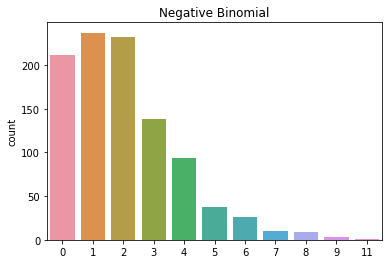

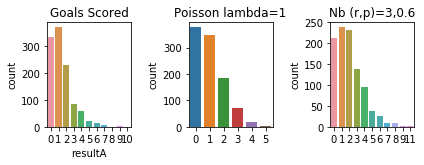

In [14]:
lam1=1

lambda1 = np.random.poisson(lam1, 1000)

nb_r = 3
nb_p = 0.60
nb=np.random.negative_binomial(nb_r, nb_p,1000)

plt.figure()
sns.countplot(nb)
plt.title("Negative Binomial")
plt.show()

plt.figure()

plt.subplot(231)
plt.title("Goals Scored")
sns.countplot(data.resultA)

plt.subplot(232)
plt.title("Poisson lambda={lam}".format(lam=lam1))
sns.countplot(lambda1)

plt.subplot(233)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.tight_layout()


We can see from these pictures that the variance of the total dataset is higher than its mean. 

In [15]:
# Encode round
rounds = {
    "Finale": 1,
    "Spiel um Platz Drei": 2,
    "Halbfinale": 3,
    "Viertelfinale": 4,
    "Achtelfinale": 5,
    "Gruppenphase": 6
}
def map_to_round(x):
    if x.startswith("Gruppe"):
        return rounds["Gruppenphase"]
    else:
        return rounds[x]
data["gametype"]=data["gametype"].apply(map_to_round)

Correlations for resultA:
 [-0.2201918  -0.00628924  0.00417705  0.20436485 -0.15591908  0.18092212
 -0.14751992  0.01714934 -0.0523357   0.11840246 -0.01476662  1.        ]
p-Values for resultA:
 [6.76486243e-14 8.32597634e-01 8.88357209e-01 3.87437386e-12
 1.34643408e-07 8.72731281e-10 6.19128030e-07 5.64346162e-01
 7.83897434e-02 6.51521633e-05 6.19679926e-01 0.00000000e+00]


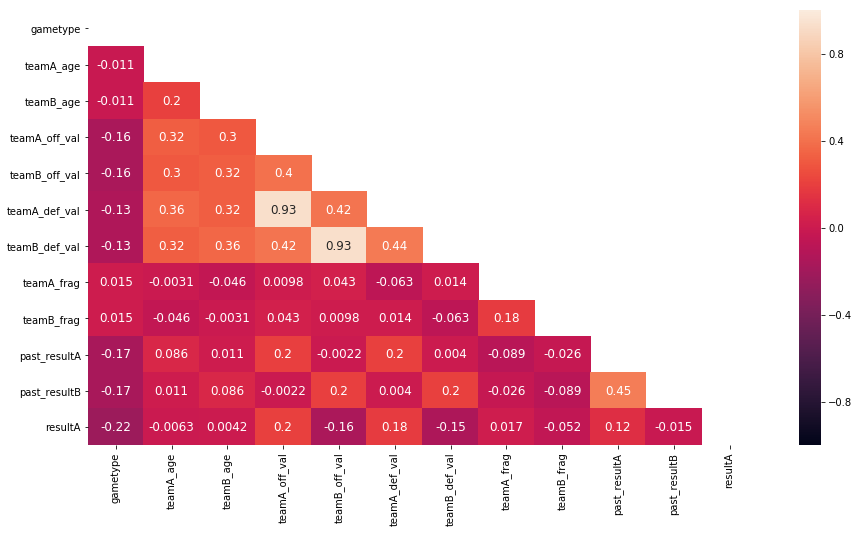

In [16]:
# correlation heatmap
# spearman correlation
# https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.spearmanr.html

# significance level 0.05

def heatmap(lab,data,filename=None):   
    encoded_dataA = data[lab]
    corrA, p_valueA = sp.stats.spearmanr(encoded_dataA)
    mask = np.zeros_like(corrA, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True    
    print("Correlations for resultA:\n",corrA[:,-1])
    print("p-Values for resultA:\n",p_valueA[:,-1])
    fig = plt.figure(figsize=(15,8))
    sns.heatmap(data=corrA,mask=mask,annot=True,annot_kws={"size":12},vmin=-1,vmax=1,xticklabels=lab,yticklabels=lab)
    plt.show()
    if filename is not None:
        fig.savefig(filename, bbox_inches='tight')

labels_A = ["gametype","teamA_age","teamB_age","teamA_off_val","teamB_off_val","teamA_def_val","teamB_def_val","teamA_frag","teamB_frag","past_resultA","past_resultB","resultA"]
heatmap(labels_A,data)

What we can see from this heatmap is that a team's offence market value is closely correlated to a team's defence market value. Perhaps it is already enough to consider the whole team's market value to remove redundancy. Other than that, the heatmap and the p-values imply the following relationships:
* The further the tournament progresses, the more goals are scored
* The larger the offence market value of a team is, the more goals are scored (same for defence)
* The smaller the offence market value of the opponent team is, the more goals are scored (same for defence)
* The more goals a team scored against the other team in the past, the more goals it scores in the actual game

# KO stage

We will now look at subsets of the full dataset to see if there are any differences in goal distributions. 
The maximum number of goals in the KO stage excluding penalty shootouts is 7.

In [17]:
data_ko=data.drop(data[data.gametype == 6].index,axis=0) # drop group stage
data_ko_nopen=data_ko.drop(data_ko[data_ko.addinfo == 'n.E.'].index,axis=0) # drop pens
data_ko_nopen.describe()

,gametype,teamA_age,teamB_age,teamA_off_val,teamB_off_val,teamA_def_val,teamB_def_val,teamA_frag,teamB_frag,past_resultA,past_resultB,resultA,resultB
count,224.000000,224.000000,224.000000,2.240000e+02,2.240000e+02,2.240000e+02,2.240000e+02,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,3.544643,26.518482,26.518482,1.023317e+07,1.023317e+07,5.748248e+06,5.748248e+06,15.629464,15.629464,1.242054,1.242054,1.424107,1.424107
std,1.241209,1.274398,1.274398,1.004109e+07,1.004109e+07,5.953171e+06,5.953171e+06,4.173505,4.173505,1.243261,1.243261,1.320263,1.320263
min,1.000000,22.770000,22.770000,7.500000e+04,7.500000e+04,8.055556e+04,8.055556e+04,5.000000,5.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,25.707500,25.707500,2.258750e+06,2.258750e+06,1.320379e+06,1.320379e+06,13.000000,13.000000,0.090000,0.090000,0.000000,0.000000
50%,4.000000,26.555000,26.555000,5.483333e+06,5.483333e+06,3.166667e+06,3.166667e+06,16.000000,16.000000,1.000000,1.000000,1.000000,1.000000
75%,4.000000,27.462500,27.462500,1.710417e+07,1.710417e+07,8.715385e+06,8.715385e+06,19.000000,19.000000,1.950000,1.950000,2.000000,2.000000
max,5.000000,29.390000,29.390000,3.870000e+07,3.870000e+07,2.407692e+07,2.407692e+07,23.000000,23.000000,6.700000,6.700000,7.000000,7.000000


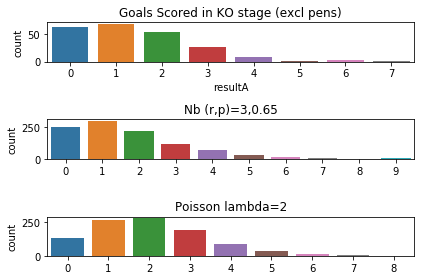

In [18]:
nb_r=3
nb_p=0.65
lam=2
nb=np.random.negative_binomial(nb_r, nb_p,1000)
po = np.random.poisson(lam, 1000)

plt.subplot(311)
plt.title("Goals Scored in KO stage (excl pens)")
sns.countplot(data_ko_nopen.resultA)

plt.subplot(312)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.subplot(313)
plt.title("Poisson lambda={lam}".format(lam=lam))
sns.countplot(po)

plt.tight_layout()

Here we see that the poisson model fails to capture the relatively high number of zeros (zero-inflated model?)

Correlations for resultA:
 [-0.05335637 -0.08745243 -0.05435344  0.15946477 -0.27533675  0.15694031
 -0.27303244 -0.03442514  0.04895071  0.17723405 -0.06907377  1.        ]
p-Values for resultA:
 [4.26809272e-01 1.92218195e-01 4.18207413e-01 1.69125992e-02
 2.92967857e-05 1.87578213e-02 3.43549038e-05 6.08302730e-01
 4.66022788e-01 7.84106577e-03 3.03363377e-01 0.00000000e+00]


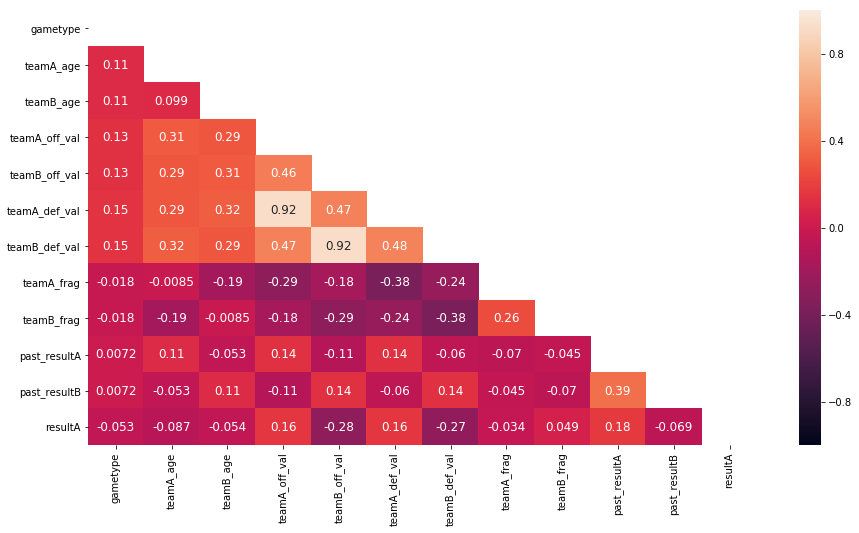

In [19]:
# significance level 0.05
heatmap(labels_A,data_ko_nopen)

## Group Stage
The maximum number of goals in the group stage is 7, the mean is lower than in the KO stage.

In [20]:
data_gr=data.drop(data[data.gametype != 6].index,axis=0)
data_gr.describe()

,gametype,teamA_age,teamB_age,teamA_off_val,teamB_off_val,teamA_def_val,teamB_def_val,teamA_frag,teamB_frag,past_resultA,past_resultB,resultA,resultB
count,838.0,838.000000,838.000000,8.380000e+02,8.380000e+02,8.380000e+02,8.380000e+02,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,6.0,26.464391,26.464391,6.656999e+06,6.656999e+06,3.896762e+06,3.896762e+06,15.669451,15.669451,0.909535,0.909535,1.180191,1.180191
std,0.0,1.255800,1.255800,7.971189e+06,7.971189e+06,4.768201e+06,4.768201e+06,4.633708,4.633708,1.154058,1.154058,1.185229,1.185229
min,6.0,21.900000,21.900000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.0,25.610000,25.610000,1.166806e+06,1.166806e+06,7.000000e+05,7.000000e+05,12.250000,12.250000,0.000000,0.000000,0.000000,0.000000
50%,6.0,26.520000,26.520000,3.450000e+06,3.450000e+06,2.122727e+06,2.122727e+06,16.000000,16.000000,0.140000,0.140000,1.000000,1.000000
75%,6.0,27.320000,27.320000,8.909343e+06,8.909343e+06,5.122596e+06,5.122596e+06,20.000000,20.000000,1.900000,1.900000,2.000000,2.000000
max,6.0,29.390000,29.390000,3.870000e+07,3.870000e+07,2.541667e+07,2.541667e+07,23.000000,23.000000,5.700000,5.700000,7.000000,7.000000


In [21]:
data_gr[data_gr.resultA == data_gr.resultB].index.shape[0]/data_gr.shape[0] #almost 1/3 are draws

0.28162291169451076

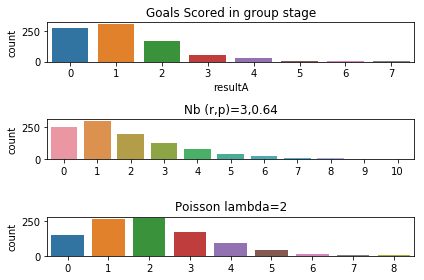

In [22]:
nb_r=3
nb_p=0.64
lam=2
nb=np.random.negative_binomial(nb_r, nb_p,1000)
po = np.random.poisson(lam, 1000)

plt.subplot(311)
plt.title("Goals Scored in group stage")
sns.countplot(data_gr.resultA)

plt.subplot(312)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.subplot(313)
plt.title("Poisson lambda={lam}".format(lam=lam))
sns.countplot(po)

plt.tight_layout()

Correlations for resultA:
 [ 0.00508316  0.02417955  0.2055349  -0.19251267  0.18970814 -0.16873024
  0.03111613 -0.08007057  0.07651862 -0.04825871  1.        ]
p-Values for resultA:
 [8.83187443e-01 4.84544156e-01 1.91074773e-09 1.94069224e-08
 3.13285555e-08 8.99622341e-07 3.68317099e-01 2.04403899e-02
 2.67586595e-02 1.62795176e-01 0.00000000e+00]


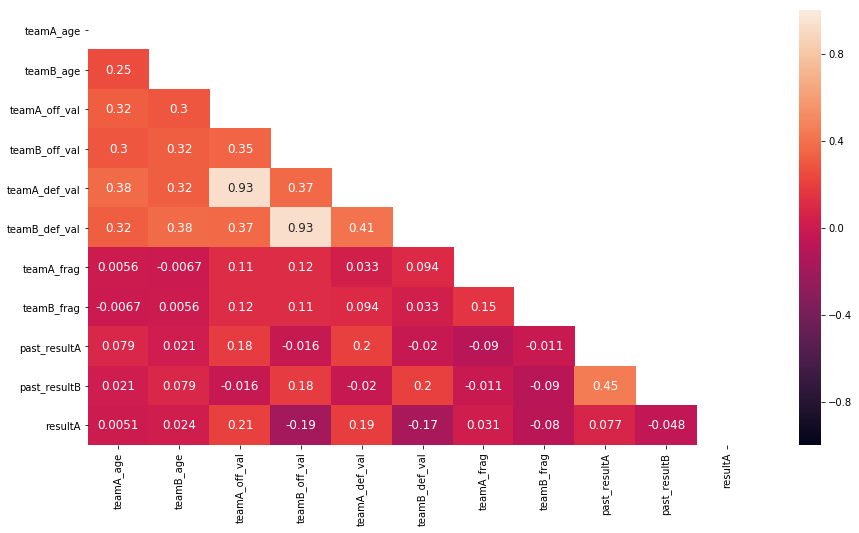

In [23]:
# correlation heatmap
# significance level 0.05

# gametype is always the same (group stage=6)
labels_A_gr = ["teamA_age","teamB_age","teamA_off_val","teamB_off_val","teamA_def_val","teamB_def_val","teamA_frag","teamB_frag","past_resultA","past_resultB","resultA"]

heatmap(labels_A_gr,data_gr)

# All games excluding penalty shootouts

In [24]:
data_nopen=data.drop(data[data.addinfo == 'n.E.'].index,axis=0)
data_nopen.describe()

,gametype,teamA_age,teamB_age,teamA_off_val,teamB_off_val,teamA_def_val,teamB_def_val,teamA_frag,teamB_frag,past_resultA,past_resultB,resultA,resultB
count,1062.000000,1062.000000,1062.000000,1.062000e+03,1.062000e+03,1.062000e+03,1.062000e+03,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000,1062.000000
mean,5.482109,26.475800,26.475800,7.411296e+06,7.411296e+06,4.287282e+06,4.287282e+06,15.661017,15.661017,0.979670,0.979670,1.231638,1.231638
std,1.152451,1.259335,1.259335,8.570106e+06,8.570106e+06,5.094664e+06,5.094664e+06,4.538656,4.538656,1.180661,1.180661,1.218386,1.218386
min,1.000000,21.900000,21.900000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,25.650000,25.650000,1.385000e+06,1.385000e+06,8.089286e+05,8.089286e+05,13.000000,13.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,26.520000,26.520000,3.720000e+06,3.720000e+06,2.340833e+06,2.340833e+06,16.000000,16.000000,0.950000,0.950000,1.000000,1.000000
75%,6.000000,27.350000,27.350000,1.052557e+07,1.052557e+07,5.746429e+06,5.746429e+06,19.000000,19.000000,1.900000,1.900000,2.000000,2.000000
max,6.000000,29.390000,29.390000,3.870000e+07,3.870000e+07,2.541667e+07,2.541667e+07,23.000000,23.000000,6.700000,6.700000,7.000000,7.000000


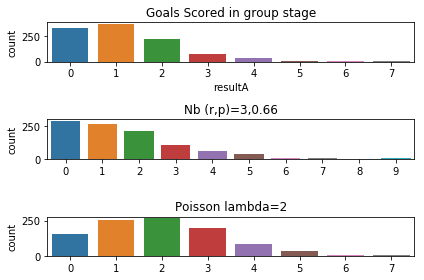

In [25]:
nb_r=3
nb_p=0.66
nb=np.random.negative_binomial(nb_r, nb_p,1000)
po = np.random.poisson(lam, 1000)

plt.subplot(311)
plt.title("Goals Scored in group stage")
sns.countplot(data_nopen.resultA)

plt.subplot(312)
plt.title("Nb (r,p)={r},{p}".format(r=nb_r, p=nb_p))
sns.countplot(nb)

plt.subplot(313)
plt.title("Poisson lambda={lam}".format(lam=lam))
sns.countplot(po)

plt.tight_layout()

Correlations for resultA:
 [-0.08149636 -0.01299218  0.00826717  0.206197   -0.19619176  0.19085248
 -0.17872573  0.01725771 -0.05695053  0.10641315 -0.04187338  1.        ]
p-Values for resultA:
 [7.88103230e-03 6.72358752e-01 7.87852196e-01 1.16293368e-11
 1.12734357e-10 3.61141580e-10 4.49679364e-09 5.74266107e-01
 6.35614488e-02 5.13504758e-04 1.72701386e-01 0.00000000e+00]


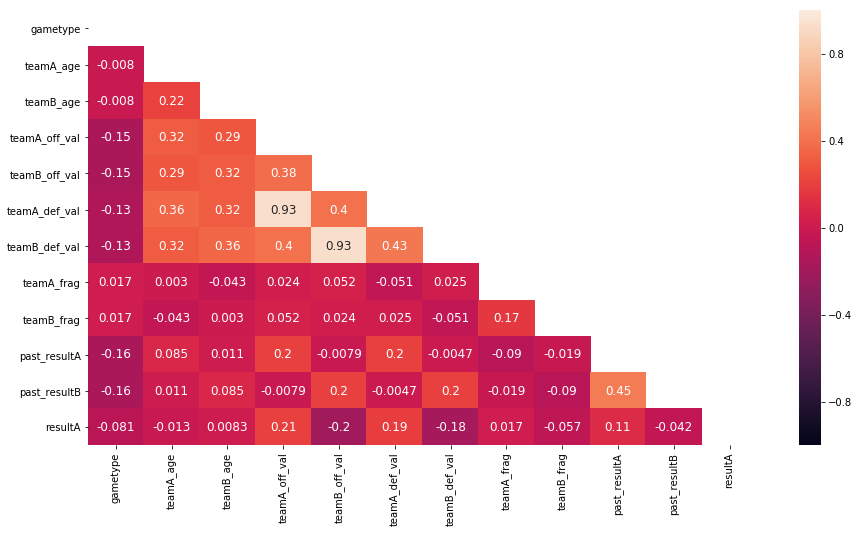

In [26]:
heatmap(labels_A,data_nopen)

Market value, past results are the most important features.